In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import string
import numpy as np

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/sign_mnist_data/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/sign_mnist_data/sign_mnist_test.csv")

In [3]:
train_df.head()
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [6]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [8]:
x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

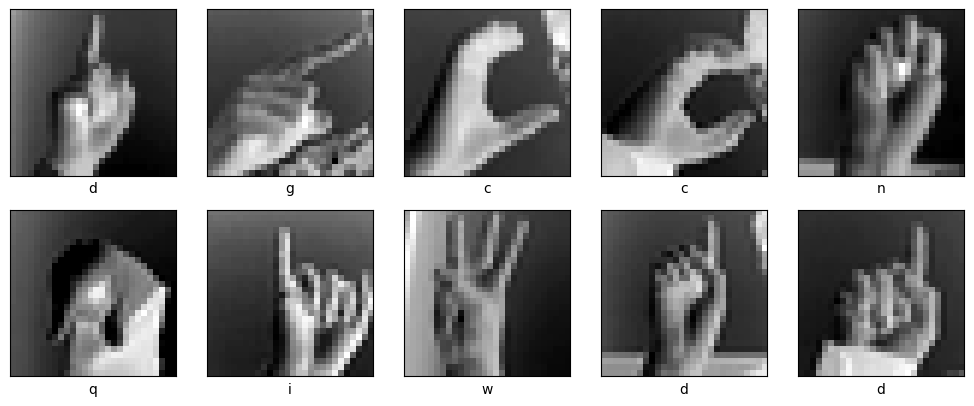

In [9]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(x_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

In [12]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 64) ,epochs = 20 , validation_data = (x_test, y_test))

Epoch 1/20
429/429 [==============================] - 125s 287ms/step - loss: 0.8237 - accuracy: 0.7369 - val_loss: 1.7427 - val_accuracy: 0.4307
Epoch 2/20
429/429 [==============================] - 112s 261ms/step - loss: 0.1490 - accuracy: 0.9496 - val_loss: 0.2903 - val_accuracy: 0.8956
Epoch 3/20
429/429 [==============================] - 112s 260ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 0.0874 - val_accuracy: 0.9709
Epoch 4/20
429/429 [==============================] - 113s 263ms/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.0448 - val_accuracy: 0.9828
Epoch 5/20
429/429 [==============================] - 109s 255ms/step - loss: 0.0444 - accuracy: 0.9842 - val_loss: 0.0582 - val_accuracy: 0.9773
Epoch 6/20
429/429 [==============================] - 119s 278ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0349 - val_accuracy: 0.9895
Epoch 7/20
429/429 [==============================] - 114s 266ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.2375 -

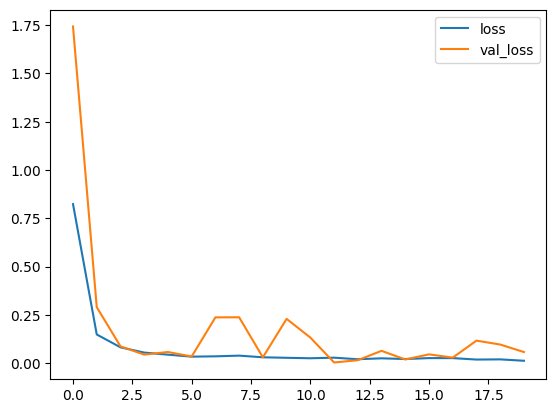

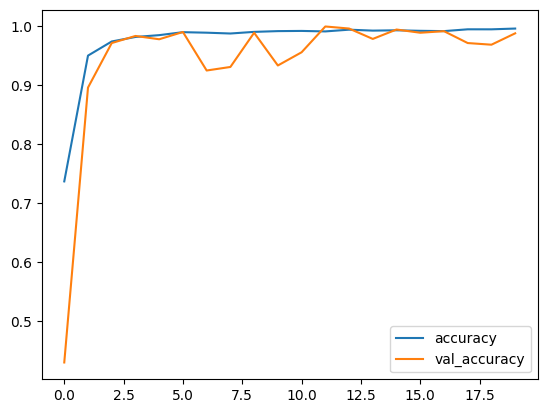

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [16]:
test_loss, test_acc=model.evaluate(x_test, y_test)

225/225 [==============================] - 13s 59ms/step - loss: 0.0581 - accuracy: 0.9873


In [17]:
print(f'test accuracy: {test_acc}')

test accuracy: 0.9873117804527283


In [18]:
train_loss, train_acc=model.evaluate(x_train, y_train)

858/858 [==============================] - 29s 34ms/step - loss: 0.0069 - accuracy: 0.9978


In [19]:
print(f'train accuracy: {train_acc}')

train accuracy: 0.9977781772613525


In [20]:
model.save('asln.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import numpy as np
from keras.models import load_model
from PIL import Image

# Load the saved model
model = load_model('asln.h5')

# Load and preprocess the hand gesture image
image_path = '/content/amer_sign2.png'
img = Image.open(image_path)
img = img.resize((28, 28))
img = np.array(img.convert('L')) / 255.0
img = img.reshape(1, 28, 28, 1)

# Make predictions
predictions = model.predict(img)

# Convert predictions to class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_names[predicted_class_index]

# Print the predicted class label
print(f'Predicted hand gesture: {predicted_class_label}')


1/1 [==============================] - 1s 543ms/step
Predicted hand gesture: A
